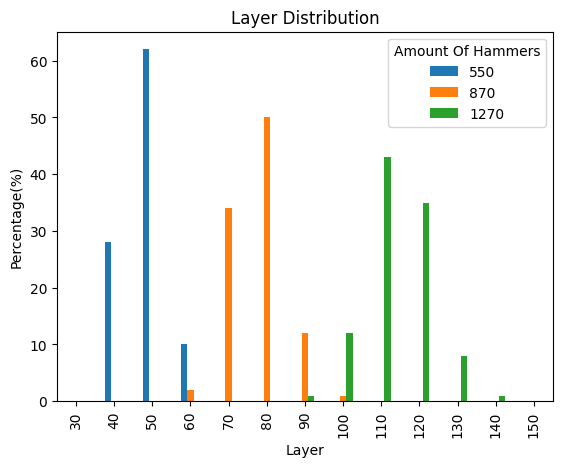

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
import crush

def main():
    results = []
    with ProcessPoolExecutor() as executor:
        for r in executor.map(crush.crush_ice, [550, 870, 1270] * 300000):
            results.append([r[0], (r[1] // 10) * 10])

    df = pd.DataFrame(results, columns=['Hammers', 'Layer'])

    preGroup = df.groupby(['Hammers'])['Layer'].value_counts().reset_index().rename(columns={'index': 'Hammers', 'Layer': 'Layer', 'count': 'Count'})
    length = df.groupby(['Hammers'])['Layer'].count().to_frame().iloc[0,0]
    preGroup['Percentage'] = preGroup['Count'].agg(lambda x: round(x / length, 2) * 100)

    pivot_table = pd.pivot_table(preGroup, values=['Percentage'], index=['Layer'], columns=['Hammers'], dropna=True)

    ax = pivot_table.plot(kind='bar', xlabel='Layer', ylabel='Percentage(%)', title='Layer Distribution')
    ax.legend(['550', '870', '1270'], title='Amount Of Hammers')

    plt.show()

if __name__ == '__main__':
    main()